# Things you can do with data: Movies
(based on Harvard Extension School (CS109)

In [2]:
from bs4 import BeautifulSoup
import requests
from pattern import web
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


## Reading the imdb url
Gets the html page

In [ ]:
url = 'http://www.imdb.com/search/title?sort=num_votes,desc&title_type=feature'
r = requests.get(url)
#print r.text



## Create dom and extract tags
Get the web page dom. "Inspect elements" of page and extract the data required

In [15]:
dom  = web.Element(r.text)
for movie in dom.by_tag('td.title'):
    runtime = movie.by_tag('span.runtime')[0].content
    title = movie.by_tag('a')[0].content
    genres = movie.by_tag('span.genre')[0]
    genres = [a.content for a in genres.by_tag('a')]
    print title,runtime,genres

The Shawshank Redemption 142 mins. [u'Crime', u'Drama']
The Dark Knight 152 mins. [u'Action', u'Crime', u'Drama']
Inception 148 mins. [u'Action', u'Mystery', u'Sci-Fi', u'Thriller']
Fight Club 139 mins. [u'Drama']
Pulp Fiction 154 mins. [u'Crime', u'Drama']
The Lord of the Rings: The Fellowship of the Ring 178 mins. [u'Adventure', u'Fantasy']
The Lord of the Rings: The Return of the King 201 mins. [u'Adventure', u'Fantasy']
The Matrix 136 mins. [u'Action', u'Sci-Fi']
Forrest Gump 142 mins. [u'Drama', u'Romance']
The Godfather 175 mins. [u'Crime', u'Drama']
The Dark Knight Rises 165 mins. [u'Action', u'Thriller']
The Lord of the Rings: The Two Towers 179 mins. [u'Action', u'Adventure', u'Fantasy']
Se7en 127 mins. [u'Drama', u'Mystery', u'Thriller']
Gladiator 155 mins. [u'Action', u'Drama']
Batman Begins 140 mins. [u'Action', u'Adventure']
The Avengers 143 mins. [u'Action', u'Adventure', u'Sci-Fi']
Avatar 162 mins. [u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']
Django Unchained 165 min

## Making sense from data
data is read from text file and pandas dataframe is created

In [18]:
names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
data = pd.read_csv('imdb_top_10000.txt', delimiter='\t', names=names).dropna()
print "Number of rows: %i" %data.shape[0]
data.head()

Number of rows: 9999


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


## Cleaning the data frame
Each column of the dataframe should be atomic and redundant information should be removed

In [21]:
data['runtime'] = [item.split(' ')[0] for item in data.runtime]
data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


In [22]:
data['title'] = [item[0:-7] for item in data.title]
data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


In [25]:
genres = set()
for movie in data.genres:
    genres.update(movie.split('|'))
genres = sorted(genres)
print genres

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [26]:
for genre in genres:
    data[genre] = [genre in movie.split('|') for movie in data.genres]
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


## Infernece from data
Display movies in each genre

In [53]:
data[genres].sum()

Action        1891
Adult            9
Adventure     1313
Animation      314
Biography      394
Comedy        3922
Crime         1867
Drama         5697
Family         754
Fantasy        916
Film-Noir       40
History        358
Horror        1215
Music          371
Musical        260
Mystery       1009
News             1
Reality-TV       1
Romance       2441
Sci-Fi         897
Sport          288
Thriller      2832
War            512
Western        235
dtype: int64

###Number of votes vs. Score 
(We take the log on number of votes as the value is two high)

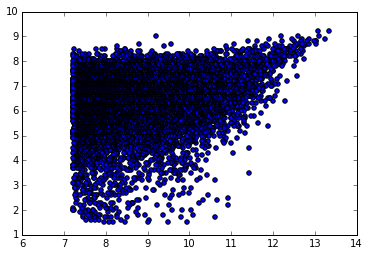

In [33]:
plt.scatter(np.log(data.votes),data.score)

### Movie with maximum score and maximum number of votes
Shawshank Redemption has the maximum score and maximum number of votes!

In [57]:
data[(data.votes==data.votes.max()) |(data.score == data.score.max())]

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26,tt0068646,The Godfather,1972,9.2,474189,175,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Movies that are most hated
Movies that are scored least with huge number of votes

In [58]:
data[(data.votes > 60000) & (data.score < 5)]

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
317,tt1259571,New Moon,2009,4.5,90457,130,Adventure|Drama|Fantasy|Romance,False,False,True,...,False,False,False,False,True,False,False,False,False,False
334,tt0118688,Batman & Robin,1997,3.5,91875,125,Action|Crime|Fantasy|Sci-Fi,True,False,False,...,False,False,False,False,False,True,False,False,False,False
507,tt0120685,Godzilla,1998,4.9,68564,139,Action|Horror|Sci-Fi|Thriller,True,False,False,...,False,False,False,False,False,True,False,True,False,False
601,tt0120891,Wild Wild West,1999,4.3,61595,106,Action|Western|Comedy|Sci-Fi,True,False,False,...,False,False,False,False,False,True,False,False,False,True


### Movies with time

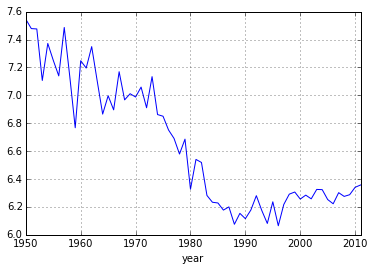

In [44]:
data.groupby('year').score.mean().plot()

### Best movie of the year goes to
(I have watched only 20 out of these)

In [51]:
for year, df in data.groupby('year'):
    print year, df[df.score == df.score.max()].title.values

 1950 ['Sunset Blvd.']
1951 ['Strangers on a Train']
1952 ["Singin' in the Rain"]
1953 ['The Wages of Fear' 'Tokyo Story']
1954 ['Seven Samurai']
1955 ['Diabolique']
1956 ['The Killing']
1957 ['12 Angry Men']
1958 ['Vertigo']
1959 ['North by Northwest']
1960 ['Psycho']
1961 ['Yojimbo']
1962 ['To Kill a Mockingbird' 'Lawrence of Arabia']
1963 ['The Great Escape' 'High and Low']
1964 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965 ['For a Few Dollars More']
1966 ['The Good, the Bad and the Ugly']
1967 ['Cool Hand Luke']
1968 ['Once Upon a Time in the West']
1969 ['Butch Cassidy and the Sundance Kid' 'Army of Shadows']
1970 ['Patton' 'The Conformist' 'Le Cercle Rouge']
1971 ['A Clockwork Orange']
1972 ['The Godfather']
1973 ['The Sting' 'Scenes from a Marriage']
1974 ['The Godfather: Part II']
1975 ['Outrageous Class']
1976 ['Tosun Pasa']
1977 ['Star Wars: Episode IV - A New Hope']
1978 ['The Girl with the Red Scarf']
1979 ['Apocalypse Now']
1980 ['Star Wars: